In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def log_fit(x, y):
    A = np.column_stack([np.ones_like(x), x])
    Q, R = np.linalg.qr(A)

    return np.linalg.solve(R, Q.T @ np.log(y))

year = np.arange(1993, 2024 + 1, 1)

flops_per_second = np.array([
    1.240e11, 1.700e11, 1.700e11, 3.680e11, 1.300e12, 1.300e12 ,2.400e12, 4.900e12,
    7.200e12, 3.590e13, 3.590e13, 7.070e13, 2.806e14, 2.806e14 ,4.782e14, 1.100e15,
    1.800e15, 2.600e15, 1.050e16, 1.760e16, 3.390e16, 3.390e16 ,3.390e16, 9.300e16,
    9.300e16, 1.435e17, 1.486e17, 4.420e17, 4.420e17, 1.102e18 ,1.194e18, 1.742e18
])

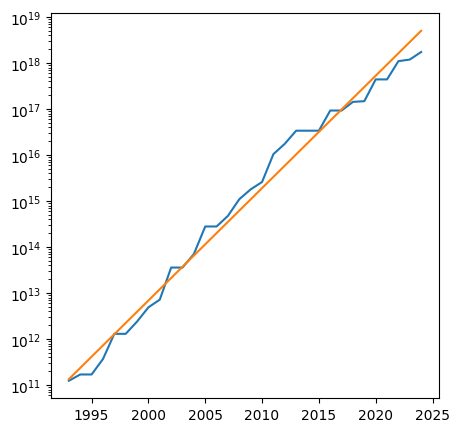

In [61]:
ln_a, b = log_fit(year, flops_per_second)

fig, ax1 = plt.subplots()

ax1.semilogy()
ax1.plot(year, flops_per_second)
ax1.plot(year, np.exp(ln_a + b * year))

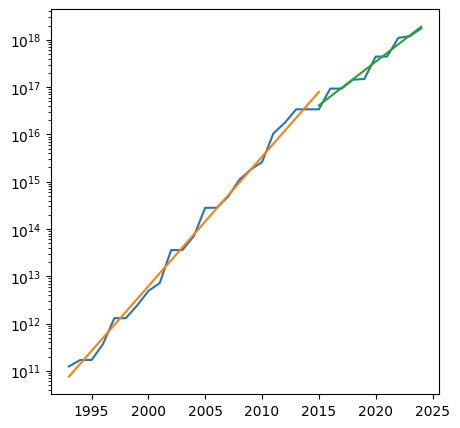

In [62]:
[[i]] = np.where(year == 2015)

ln_a1, b1 = log_fit(year[:i + 1], flops_per_second[:i + 1])
ln_a2, b2 = log_fit(year[i:], flops_per_second[i:])

fig, ax2 = plt.subplots()

ax2.semilogy()
ax2.plot(year, flops_per_second)
ax2.plot(year[:i + 1], np.exp(ln_a1 + b1 * year[:i + 1]))
ax2.plot(year[i:], np.exp(ln_a2 + b2 * year[i:]))

In [63]:
error = np.abs(np.log(flops_per_second) - (ln_a + b * year))

print(f"Maximum Error: {max(error):.2f}")

actual_1969 = 3.6e7

pred_1969 = np.exp(ln_a + b * 1969)

print(f"Predicted Flops in 1969: {pred_1969:.0f}")
print(f"Extrapolation Error (1969): {np.log(actual_1969) - np.log(pred_1969):.2f}")



Maximum Error: 1.19
Predicted Flops in 1969: 183977
Extrapolation Error (1969): 5.28


It is clear from this that the error when predicting a value outside of the sampling range is much larger than the error when predicting inside the sample range.